In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datasets/Restaurant_reviews.tsv' , delimiter= '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
dataset['length'] = [len(t) for t in dataset.Review]
dataset.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [4]:
import re                 
import nltk                        
# un comment nltk.download('stopwords') if you're running for the first time
#nltk.download('stopwords')         # Download stopwords from nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus = []                     

# Iterating through all the reviews
for i in range(0,1000):
    # Removing unnecessary punctuations and numbers except letters and replacing removed words with space.
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review  = review.split()
    
    ps = WordNetLemmatizer()
    words = stopwords.words('english')
    words.remove('not')
    words.remove('no')
    words.remove('but')
    words.remove('is')
    review = [ps.lemmatize(word) for word in review if not word in set(words)]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1566)                  
X = cv.fit_transform(corpus).toarray()                 # toarray() is used to convert into matrix
y = dataset.iloc[:,1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)

In [7]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=0)
clf.fit(X_train, y_train)

#Predicting the test result
y_pred = clf.predict(X_test)

In [8]:
z = cv.inverse_transform(X_test)

In [9]:
results = pd.DataFrame({
    'z': np.array(z).flatten(),
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred).flatten(),
})

results[0:20]

,z,Actual,Predicted
0,"[awful, food, presentation]",0,0
1,"[food, service, worst]",0,0
2,"[dining, never, place]",0,0
3,"[but, disgraceful, guess, maybe, night, went]",0,0
4,"[avoid, lover, mean, place, sushi]",0,0
5,"[ambiance, better, much]",0,0
6,"[friendly, great, mexican, staff, street, taco...",1,1
7,"[annoying, bad, dealing, drunk, enjoy, enough,...",0,0
8,"[back, ever, go, never]",0,0
9,"[atmosphere, fun, is]",1,1


0.87


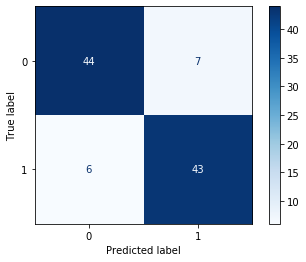

In [10]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.86      0.88      0.87        49

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

